# **Problem**

## **Dataset Description**

**Context:**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Content:**

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## **Exercises**

### **Exercise 1:**
**Import required Packages**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Your Code Here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


### **Exercise 2:**
**Load the data and give column names as 'pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label'** 

In [3]:
# Your Code Here
FILE_PATH = '/content/drive/MyDrive/Colab Notebooks/ML/Home Assignment/Day5/pima-indians-diabetes.csv'
data = pd.read_csv(FILE_PATH)

In [4]:
data.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [5]:
# features = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree', 'skin']
features = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data.columns = features

X = data[features]
y = data['label']

### **Exercise 3:**
**Data Munging**

**1) Check the descriptive information of Dataset using pandas describe and info methods**

In [6]:
# Your Code Here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  767 non-null    int64  
 1   glucose   767 non-null    int64  
 2   bp        767 non-null    int64  
 3   skin      767 non-null    int64  
 4   insulin   767 non-null    int64  
 5   bmi       767 non-null    float64
 6   pedigree  767 non-null    float64
 7   age       767 non-null    int64  
 8   label     767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**2) Check for nulls in the dataset columns and if nulls encountered fill the data columns with suitable values based on central tendency measures(mean, median, mode)**

In [8]:
# Your Code Here
data.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

There is no Nan value in data

In [15]:
dict = {}
for i in list(data.columns):
    dict[i] = data[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
pregnant,17
glucose,136
bp,47
skin,51
insulin,186
bmi,248
pedigree,516
age,52
label,2


In [19]:
data['age'].unique()

array([31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 50, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

**3) Write a function to plot graphs between all independent features against dependent features in the dataset and find the relationship.**

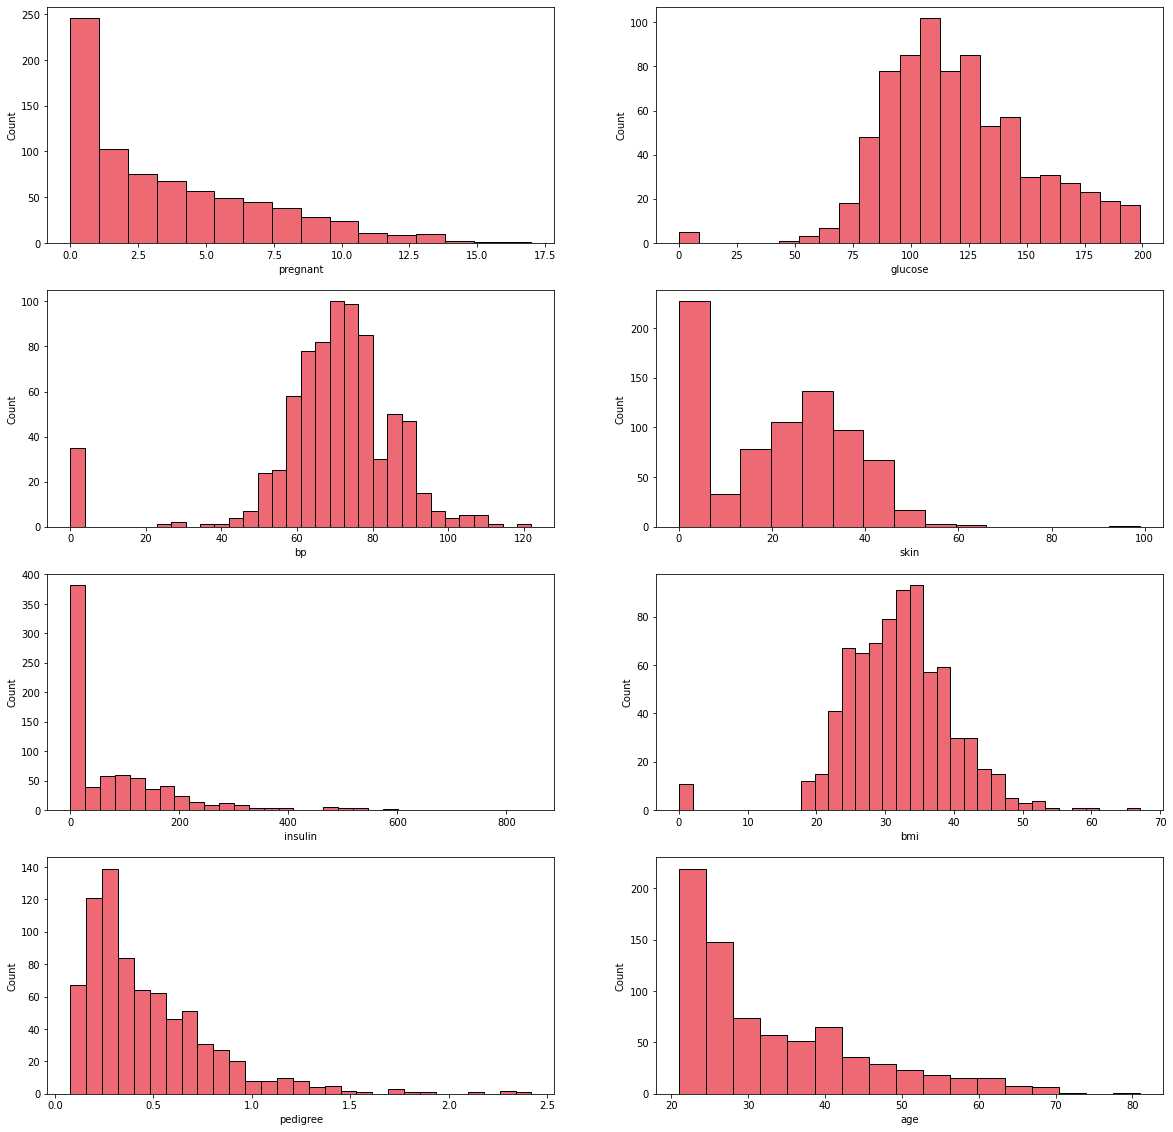

In [66]:
from typing import List

def plot_hist(df: pd.DataFrame, features: List[str]) -> None:
    plt.figure(figsize=(20, 20))
    for loc, feature in enumerate(features):
        ax = plt.subplot(4, 2, loc+1)
        sns.histplot(df[feature], color='#E83845')
        # sns.displot(df, x=feature, hue="label", kind="kde", multiple="stack")
    plt.show()
    plt.close()
    return None 

plot_hist(data, features[:-1])

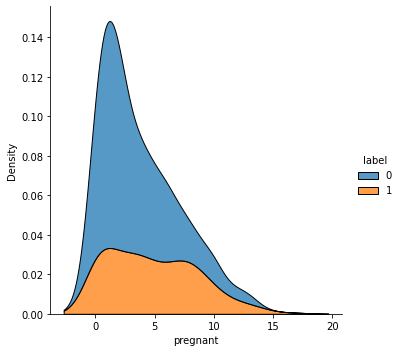

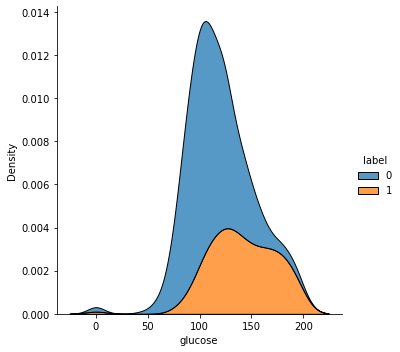

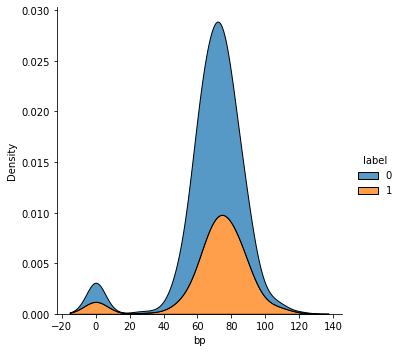

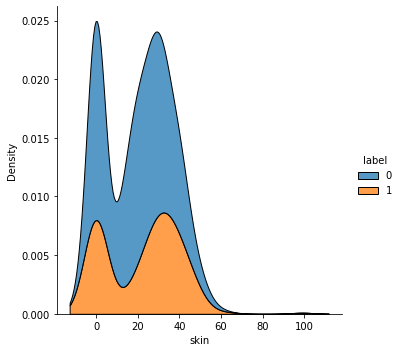

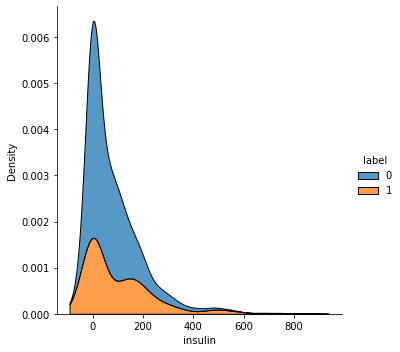

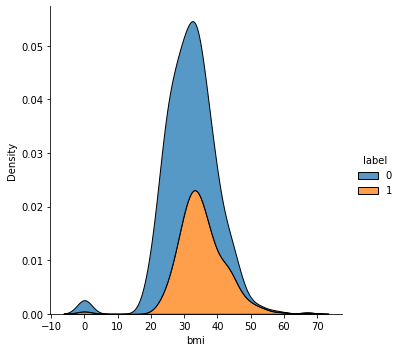

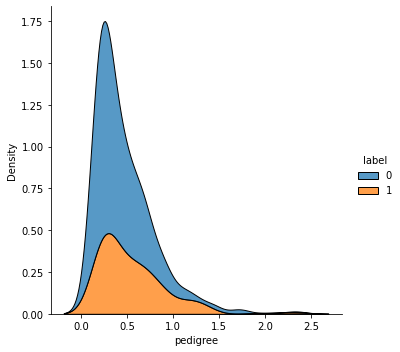

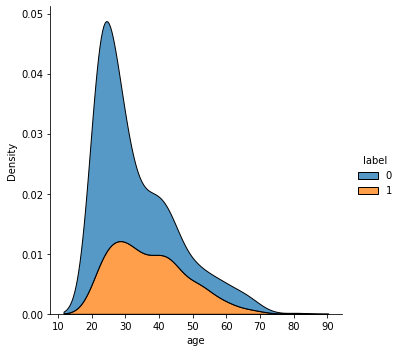

In [67]:
# Your Code Here
from typing import List
def graphs_between_independent(features: List[str]) -> None:
    for col in features:
        sns.displot(data, x=col, hue="label", kind="kde", multiple="stack")

graphs_between_independent(features[:-1])

**4) Plot a suitable graph to find multicollinearity(relationship between independent features) in the given dataset.** 

For **Hint** select the below empty whitespace above the arrow: 

<font color='white'>Check Pairplot in seaborn</font>

<font color='white'>$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$</font>$\uparrow$

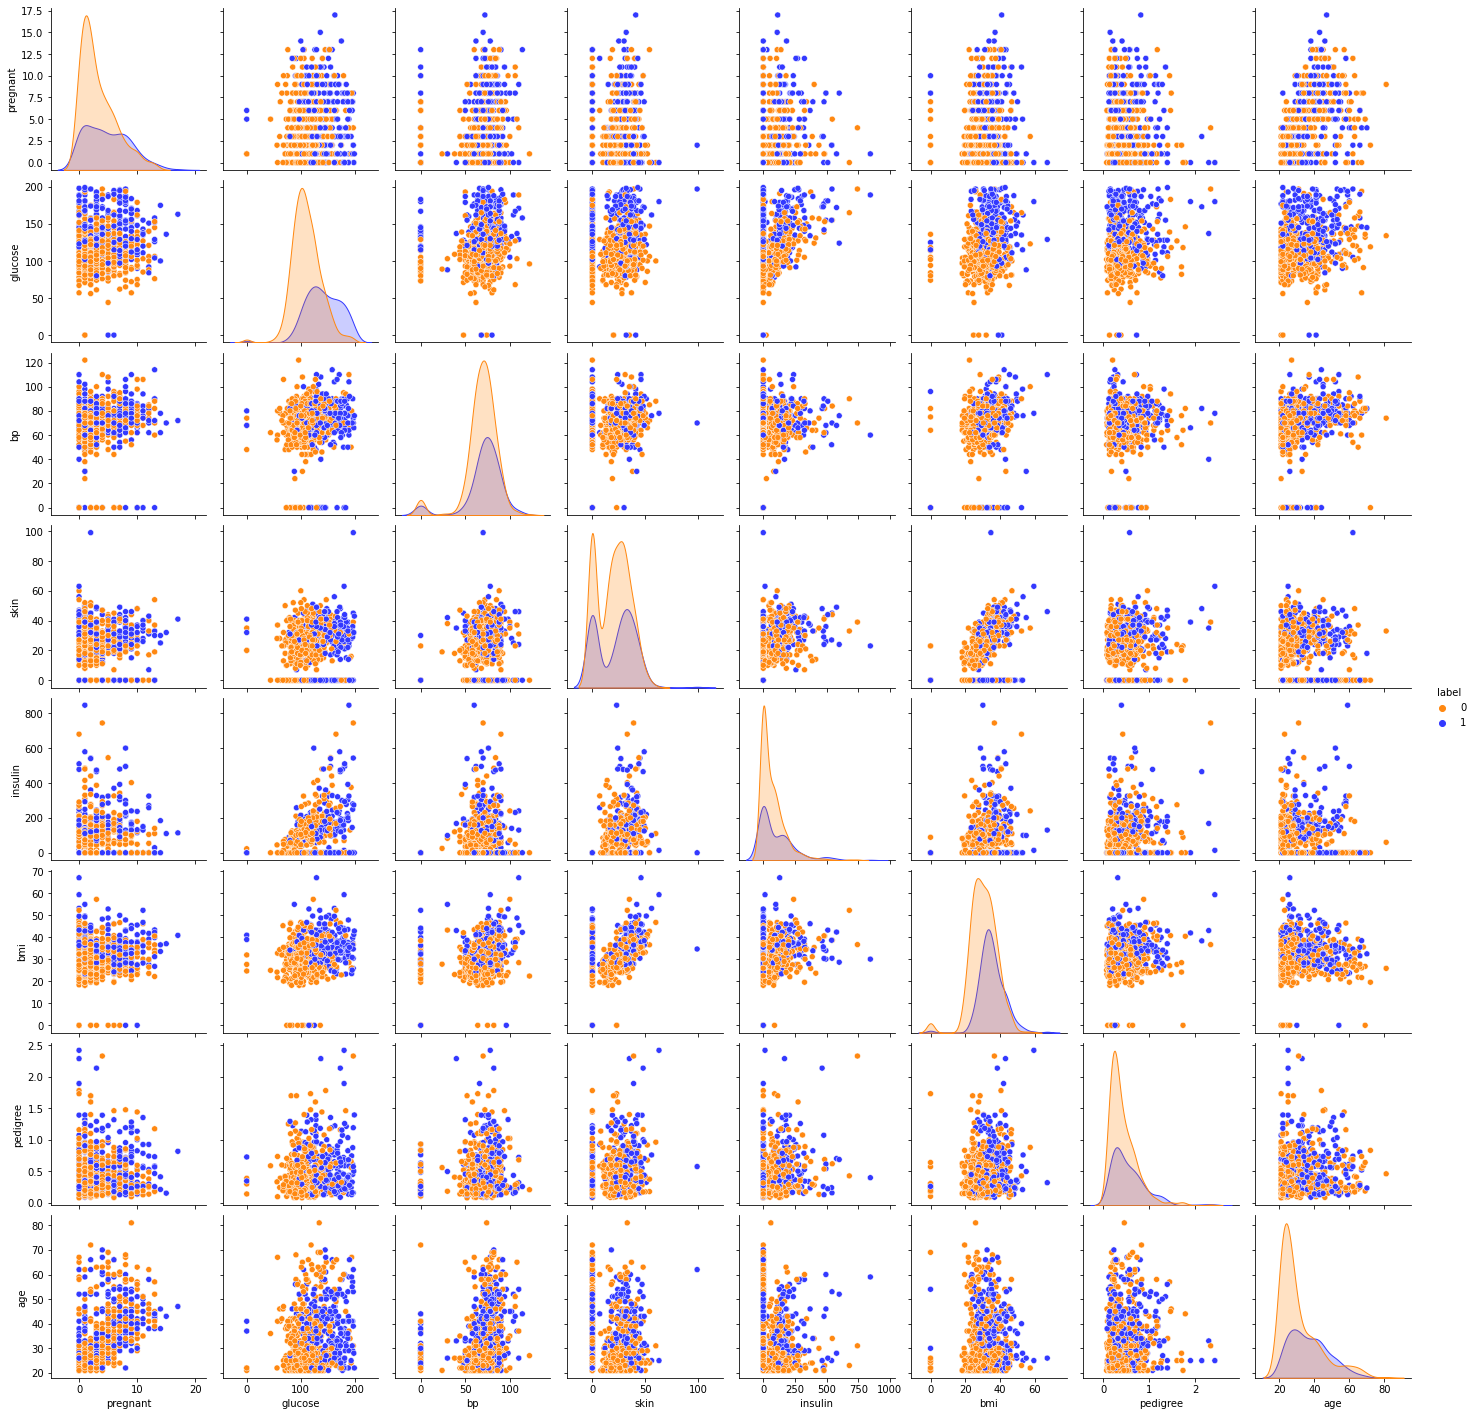

In [61]:
# Your Code Here
sns.pairplot(data,hue='label',palette = ["#ff8811","#3339FF"])
plt.show()

**5) Find the correlation between the features and labels using heatmaps and correlation matrix.**

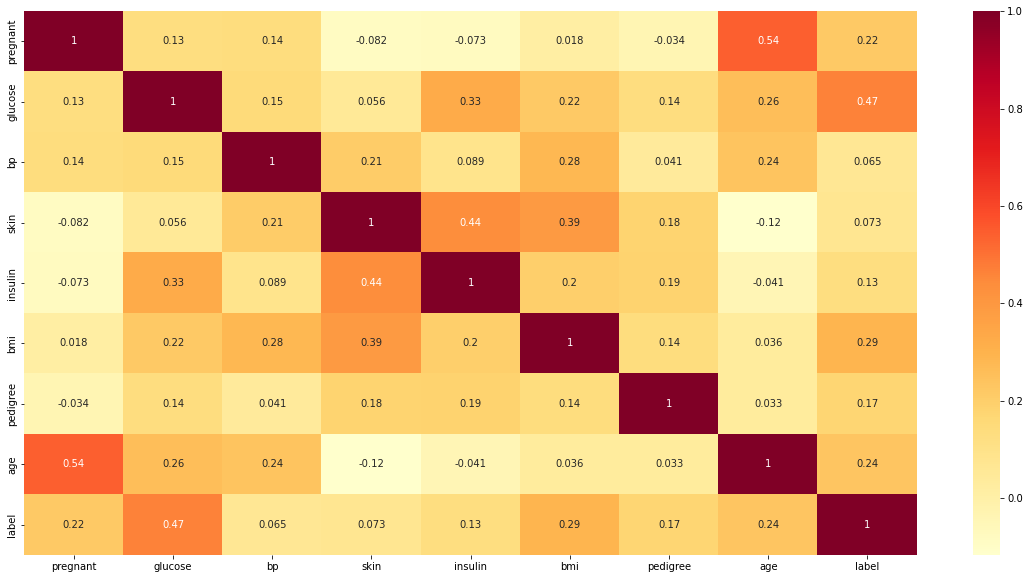

In [68]:
# Your Code Here
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, cmap='YlOrRd')
plt.show()
plt.close()

**6) Apply Feature scaling to standardize the data columns to common units to avoid biased model.** 

For **Hint** select the below empty whitespace above the arrow: 

<font color='white'>Check StandardScaler</font>

<font color='white'>$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$$\uparrow$</font>$\uparrow$

In [72]:
# Your Code Here
from sklearn.preprocessing import StandardScaler

# creating a copy of dataframe
df = data
col_cols = list(df.columns)

# removing the target variable from the columns list
col_cols.pop() 

# separating the features and target 
X = df.drop(['label'],axis=1)
y = df[['label']]

# instantiating the scaler
scaler = StandardScaler()
X[col_cols] = scaler.fit_transform(X[col_cols])
X.head()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
0,-0.843726,-1.122086,-0.160249,0.532023,-0.693559,-0.683729,-0.364265,-0.188940
1,1.234240,1.944476,-0.263578,-1.286882,-0.693559,-1.102301,0.604701,-0.103795
2,-0.843726,-0.996920,-0.160249,0.155698,0.122357,-0.493469,-0.919684,-1.040393
3,-1.140579,0.505069,-1.503534,0.908349,0.764674,1.409132,5.482732,-0.018650
4,0.343683,-0.152051,0.253070,-1.286882,-0.693559,-0.810569,-0.817052,-0.274086


### **Exercise 4:**
**Split the data into train and test data**

In [74]:
# Your Code Here
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((613, 8), (154, 8), (613, 1), (154, 1))

### **Exercise 5:**
**Build the Decision Tree and Random Forest models and identify the best model**

In [80]:
# Your Code Here
# Build the Decision Tree model
from sklearn.metrics import mean_squared_error
dtm = DecisionTreeClassifier()
dtm.fit(X_train, y_train)
y_pred = dtm.predict(X_test)

print(f"Accuracy Score : {(accuracy_score(y_test,y_pred))}\n")


Accuracy Score : 0.6948051948051948



In [77]:

rfm = RandomForestClassifier()
rfm.fit(X_train, y_train)
y_pred = rfm.predict(X_test)

print(f"Accuracy Score : {(accuracy_score(y_test,y_pred))}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy Score : 0.7857142857142857
